# Array of Things Tutorial

Learn more about the Array of Things at the project [website](https://arrayofthings.github.io) and at the waggle [website](https://wa8.gl).

AoT Data is described [here](https://github.com/waggle-sensor/waggle/tree/master/data) and tools for manipulating the data can be found [here](https://github.com/waggle-sensor/data-tools).

Data from various locations can be found [here](http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/index.php).

## We will be making the material from this tutorial available after the workshop!
### Watch the Community Sensing (https://github.com/ddiLab/CommunitySensing) github repo. 


In [4]:
# Change this variable to point to where your data is located
AoT_Data_Directory = '/projects/visualization/papka/DATA/AoT_Chicago.complete.2018-08-17'

For this tutorial, we will use python 3.x and the [pandas](https://pandas.pydata.org) module.

# Nodes dataset from AoT

In [5]:
# using pandas to store and manipulate the AoT data
import pandas as pd

# read_csv reads in data from file, where values are seperated by ",", since
# dataset does have headers each column in the pandas dataframe will be named based on row zero of the csv file
nodes = pd.read_csv(AoT_Data_Directory + '/nodes.csv', sep=",")

# the first 10 rows of data is displayed below
nodes.head(10)

node_id   project_id  vsn                                address  \
0  001e0610ba46  AoT_Chicago  004     State St & Jackson Blvd Chicago IL   
1  001e0610ba3b  AoT_Chicago  006     18th St & Lake Shore Dr Chicago IL   
2  001e0610ba8f  AoT_Chicago  00D           Cornell & 47th St Chicago IL   
3  001e0610ba16  AoT_Chicago  010         Ohio St & Grand Ave Chicago IL   
4  001e0610ba8b  AoT_Chicago  018  Stony Island Ave & 63rd St Chicago IL   
5  001e0610ba18  AoT_Chicago  01D          Damen Ave & Cermak Chicago IL   
6  001e0610bc10  AoT_Chicago  01F             State St & 87th Chicago IL   
7  001e0610bbf9  AoT_Chicago  020       Western Ave & 69th St Chicago IL   
8  001e0610bbff  AoT_Chicago  025       Western Ave & 18th St Chicago IL   
9  001e0610ba15  AoT_Chicago  02A       Jeffrey Ave & 95th St Chicago IL   

         lat        lon          description      start_timestamp  \
0  41.878377 -87.627678  AoT Chicago (S) [C]  2017/10/09 00:00:00   
1  41.858136 -87.616055      AoT Chicago (S)  2017/08/08 00:00:00   
2  41.810342 -87.590228      AoT Chicago (S)  2017/08/08 00:00:00   
3  41.891964 -87.611603  AoT Chicago (S) [C]  2017/12/01 00:00:00   
4  41.780600 -87.586456  AoT Chicago (S) [C]  2018/02/26 00:00:00   
5  41.852179 -87.675825      AoT Chicago (S)  2017/12/15 00:00:00   
6  41.736314 -87.624179  AoT Chicago (S) [C]  2018/02/22 00:00:00   
7  41.768319 -87.683396  AoT Chicago (S) [C]  2018/02/13 00:00:00   
8  41.857797 -87.685806      AoT Chicago (S)  2017/12/15 00:00:00   
9  41.722457 -87.575350  AoT Chicago (S) [C]  2018/02/22 00:00:00   

         end_timestamp  
0                  NaN  
1                  NaN  
2                  NaN  
3  2018/06/04 00:00:00  
4                  NaN  
5                  NaN  
6                  NaN  
7                  NaN  
8                  NaN  
9                  NaN

In [3]:
nodes.shape

(90, 9)

This tells how many nodes are in the **current** dataset.

Using this **nodes.csv** dataset we can learn a lot about the state of the instrument.

We will start with the deployment rate of nodes in the city of Chicago.

Text(0,0.5,'Number of Nodes')

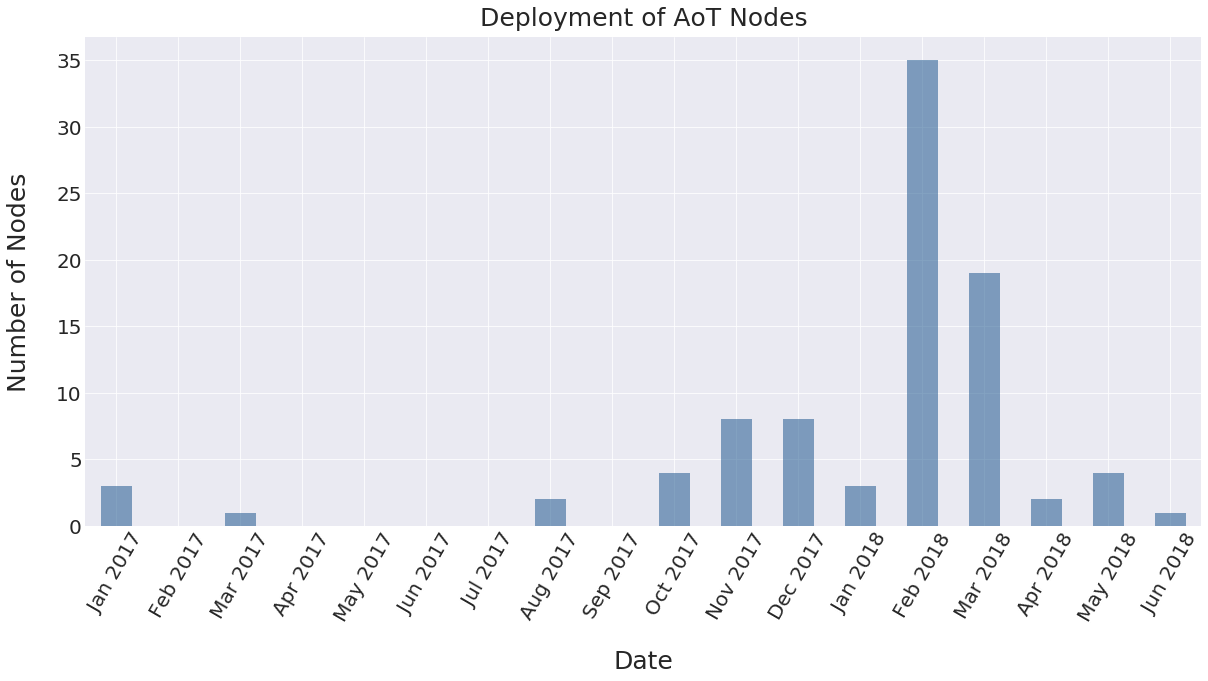

In [6]:
#
# Plotting the deployment of AoT nodes in Chicago based on when they started reporting data to the beehive
#
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Convert that column into a datetime datatype
nodes['start_timestamp'] = pd.to_datetime(nodes['start_timestamp'])
# Set the datetime column as the index
nodes.index = nodes['start_timestamp'] 

# Count up the number of nodes deployed in each month
nodecount = nodes['node_id'].resample('M').count()

# Set the graphing style we will use (https://matplotlib.org/users/style_sheets.html)
plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()
nodecount.plot(kind='bar', ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6))


f = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%b %Y')
ax.set_xticklabels([ f(x.get_text()) for x in ax.get_xticklabels()])
plt.xticks(fontsize = 20, rotation=60)
plt.yticks(fontsize = 20)

# Set title and labels
ax.set_title('Deployment of AoT Nodes',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_xlabel('Date',fontsize = 25, labelpad=25)
ax.set_ylabel('Number of Nodes',fontsize = 25, labelpad=25)

Text(0,0.5,'Number of Nodes')

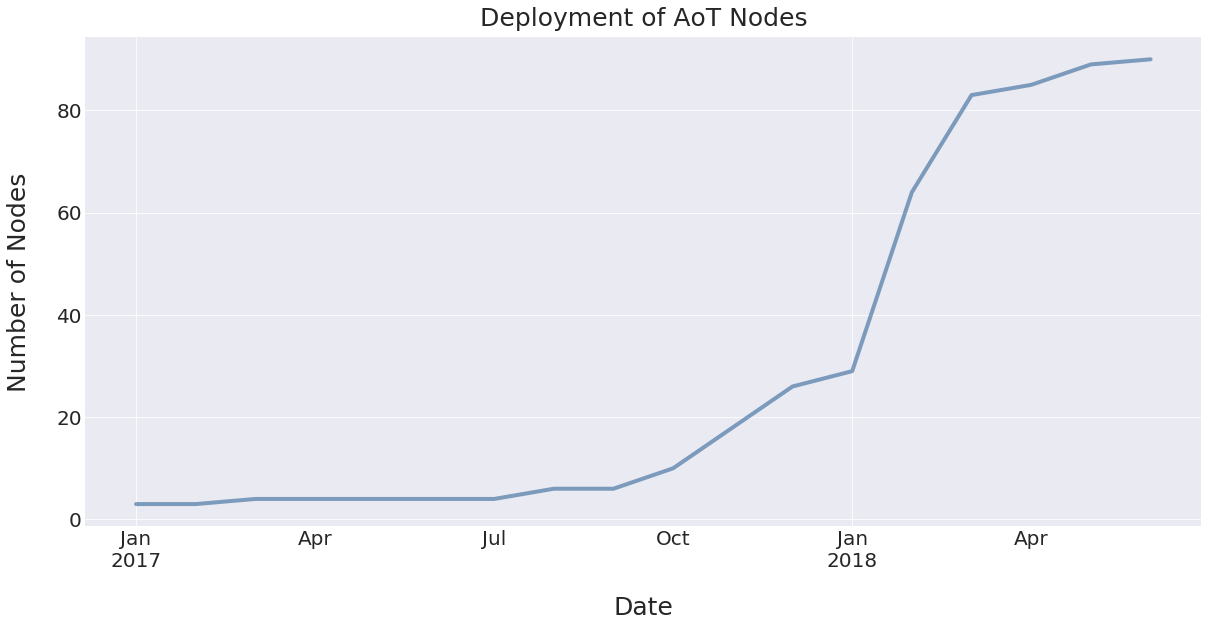

In [7]:
#
# Plotting the deployment of AoT nodes in Chicago based on when they started reporting data to the beehive
#
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Convert that column into a datetime datatype
nodes['start_timestamp'] = pd.to_datetime(nodes['start_timestamp'])
# Set the datetime column as the index
nodes.index = nodes['start_timestamp'] 

# Count up the number of nodes deployed in each month
nodecount = nodes['node_id'].resample('M').count()

# Set the graphing style we will use (https://matplotlib.org/users/style_sheets.html)
plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()
nodecount.sort_index().cumsum().plot(ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6), linewidth=4)

plt.tick_params(axis='both', which='both', labelsize=20)

# Set title and labels
ax.set_title('Deployment of AoT Nodes',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_xlabel('Date',fontsize = 25, labelpad=25)
ax.set_ylabel('Number of Nodes',fontsize = 25, labelpad=25)

We can also see where the nodes are located within Chicago.

In [8]:
#
# Setting global variables for shapefiles for Chicago
#
Chicago_Streets_Shapefiles = '/projects/visualization/papka/DATA/Chicago-Street-Shapefile/geo_export_0f87439d-e108-4a32-91f2-393866a70bf4.shp'
Chicago_Boundary_Shapefile = '/projects/visualization/papka/DATA/Chicago-Boundary-Shapefile/geo_export_38b8f3d2-6e13-4b7f-858b-7895f4e6c207.shp'

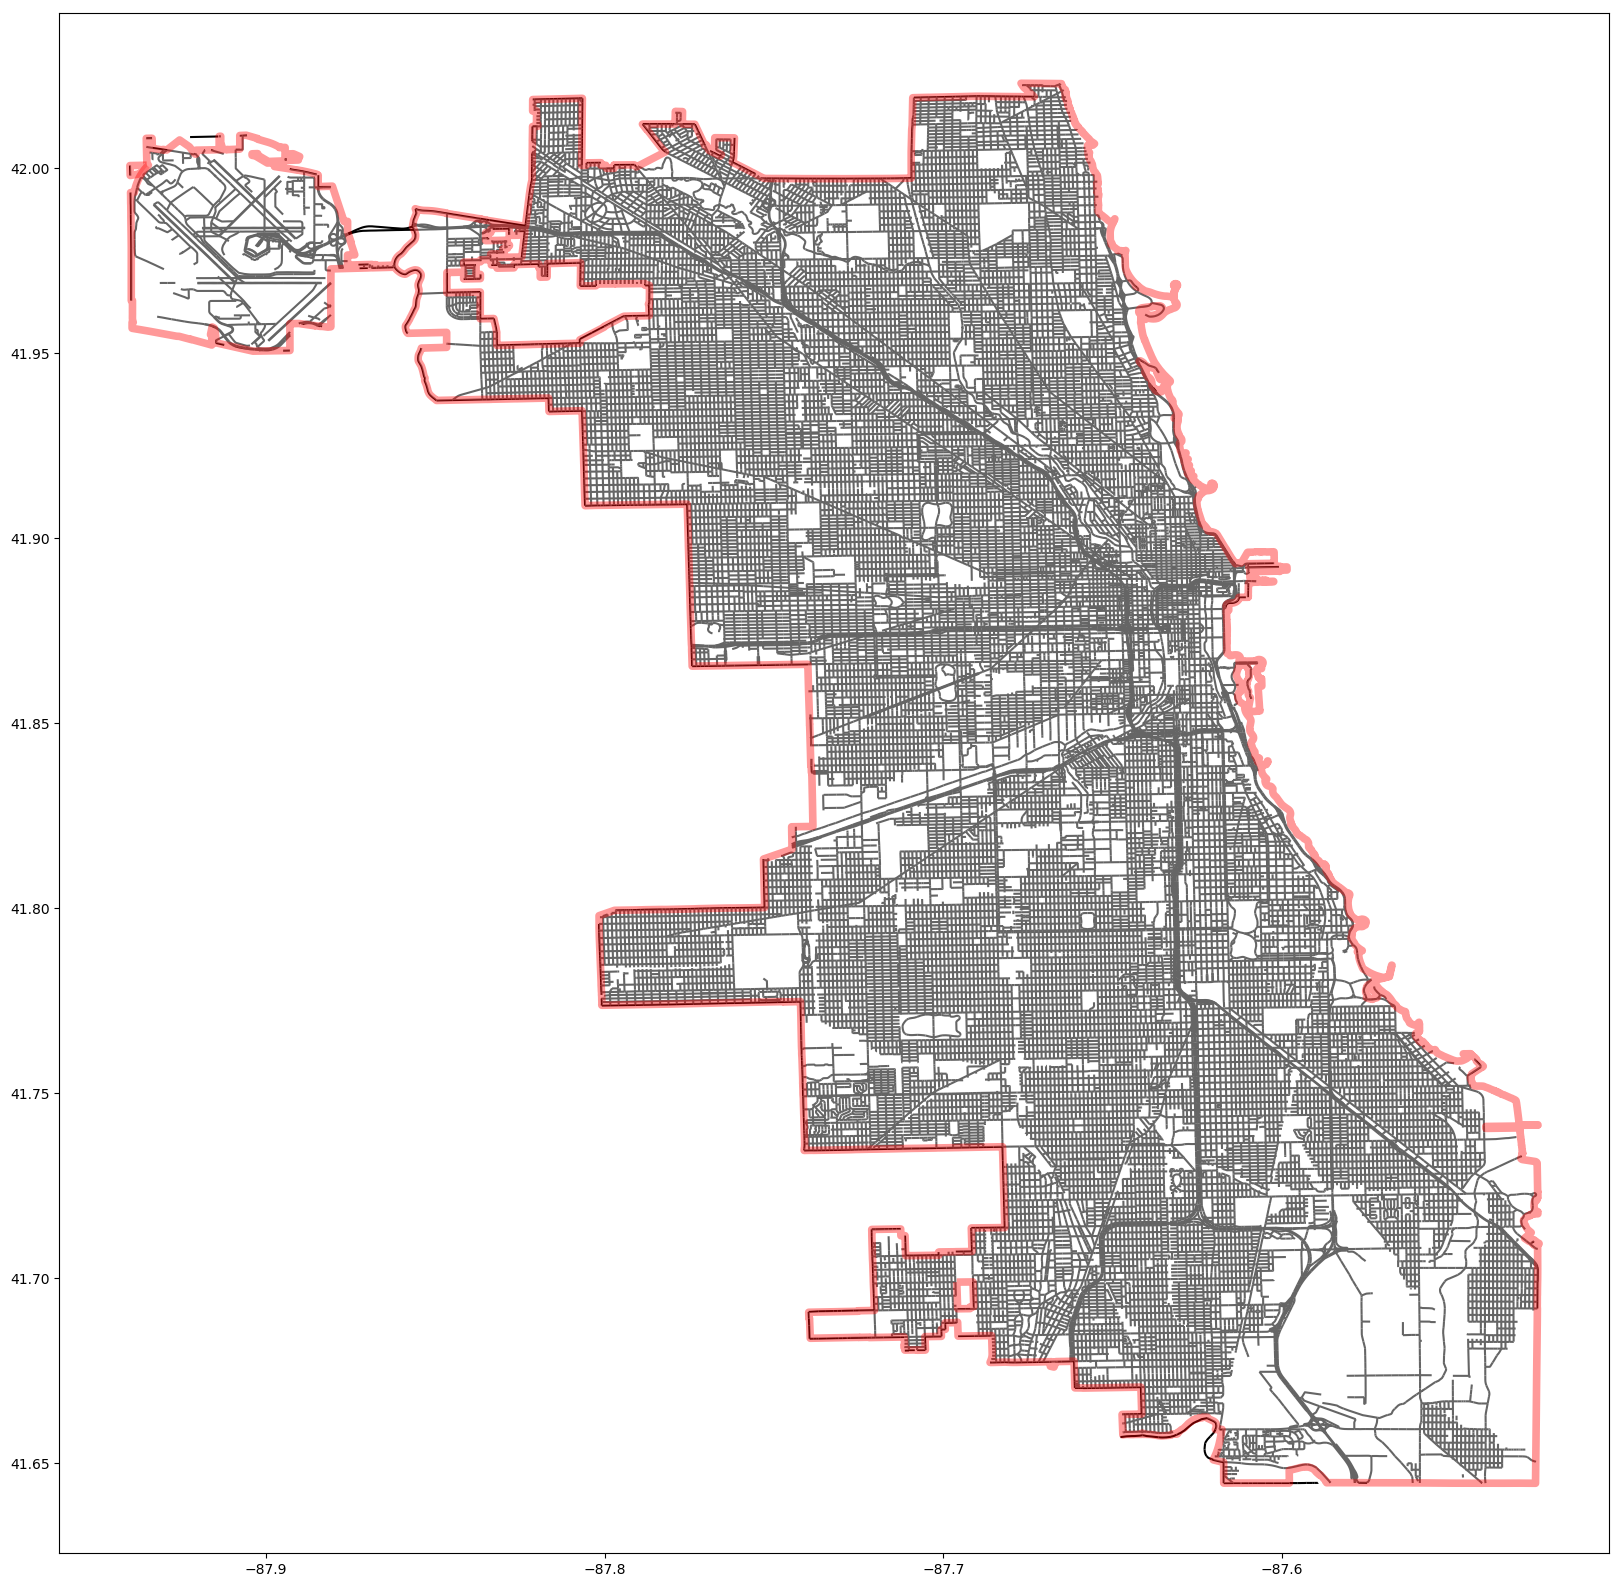

In [9]:
#
# Sample on how to load and draw shapefiles to begin geospatial visualizations of nodes
#

# GeoPandas extends pandas for geospatial data (http://geopandas.org) 
import geopandas as gpd

# The equivalent of CSS style sheet for matplotlib 
# https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
plt.style.use('default')

# This reads in a shapesfile (GIS data format) that is a mapping of Chicago streets
streetmap = gpd.read_file(Chicago_Streets_Shapefiles)

# This is done to draw multiple layers on top of each other, streets and boundary
# subplots returns a figure (f) and an array of axes (ax) - ax is used to layer images
f, ax = plt.subplots(1, figsize=(20, 20))

# Plots the Chicago streets
# use of ax places all the plots on top of each other, zorder controls the stacking, 0 lower and 10 higher
streetmap.plot(ax=ax, color='black', zorder = 0)

# Place red border around Chicago
boundary = gpd.read_file(Chicago_Boundary_Shapefile)
# Plots the Chicago neighborhoods
boundary.plot(ax=ax, color='white', alpha = 0.4, linewidth=5.5, edgecolor='red', zorder = 10)

Text(0.5,1,'AoT Node Deployment in Chicago')

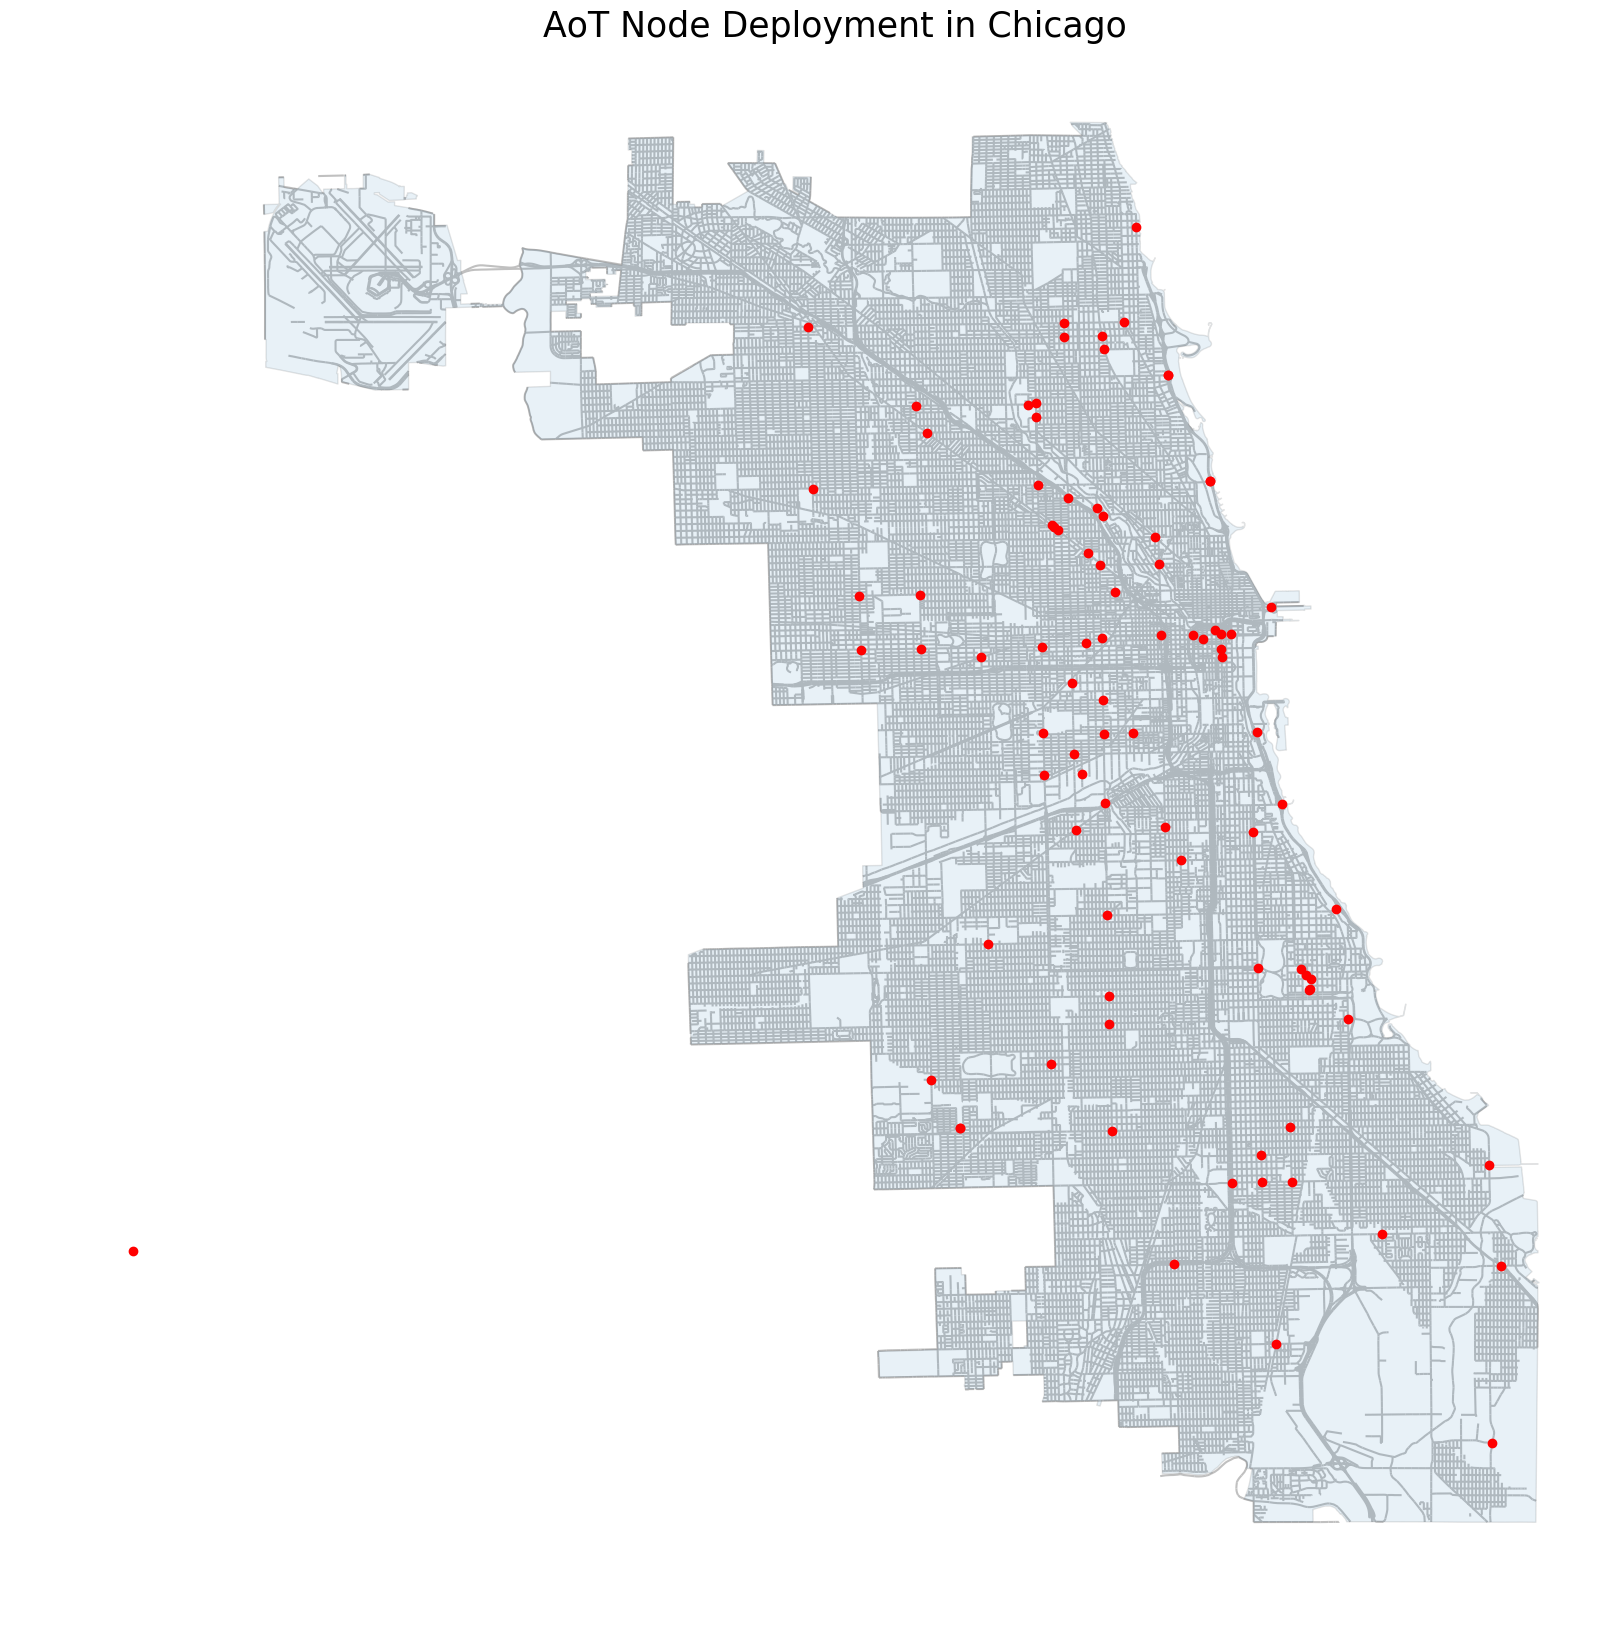

In [189]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

# Create an empty dataframe
node_locations = pd.DataFrame()
# Pull the longitude and latitude information from the "nodes" dataframe
# Use zip to create set of lon, lat tuples then put into a list
node_locations['Coordinates'] = list(zip(nodes.lon, nodes.lat))
# Turn the list of node locations stored in Coordinates into a "Point" so we can use on plot
node_locations['Coordinates'] = node_locations['Coordinates'].apply(Point)
# Create a GeoDataFrame of node locations
node_locationsDF = gpd.GeoDataFrame(node_locations, geometry='Coordinates')

plt.style.use('default')

# This reads in a shapesfile (GIS data format) that is a mapping of Chicago streets
streetmap = gpd.read_file(Chicago_Streets_Shapefiles)

f, ax = plt.subplots(1, figsize=(20, 20))

# Plots the Chicago streets
streetmap.plot(ax=ax, color='silver', zorder = 0)

boundary = gpd.read_file(Chicago_Boundary_Shapefile)
# Plots the boundary of Chicago 
boundary.plot(ax = ax, alpha = 0.1, linewidth = 1.0, edgecolor = 'black', zorder = 5)

# plot locations on the map as a new layer - zorder ensures the nodes are on top
node_locationsDF.plot(ax = ax, color = 'red', zorder = 10)

ax.set_axis_off()
ax.set_title('AoT Node Deployment in Chicago',fontsize = 25, fontdict = {'verticalalignment':'bottom'})

Text(0.5,1,'AoT Node Deployment in Chicago')

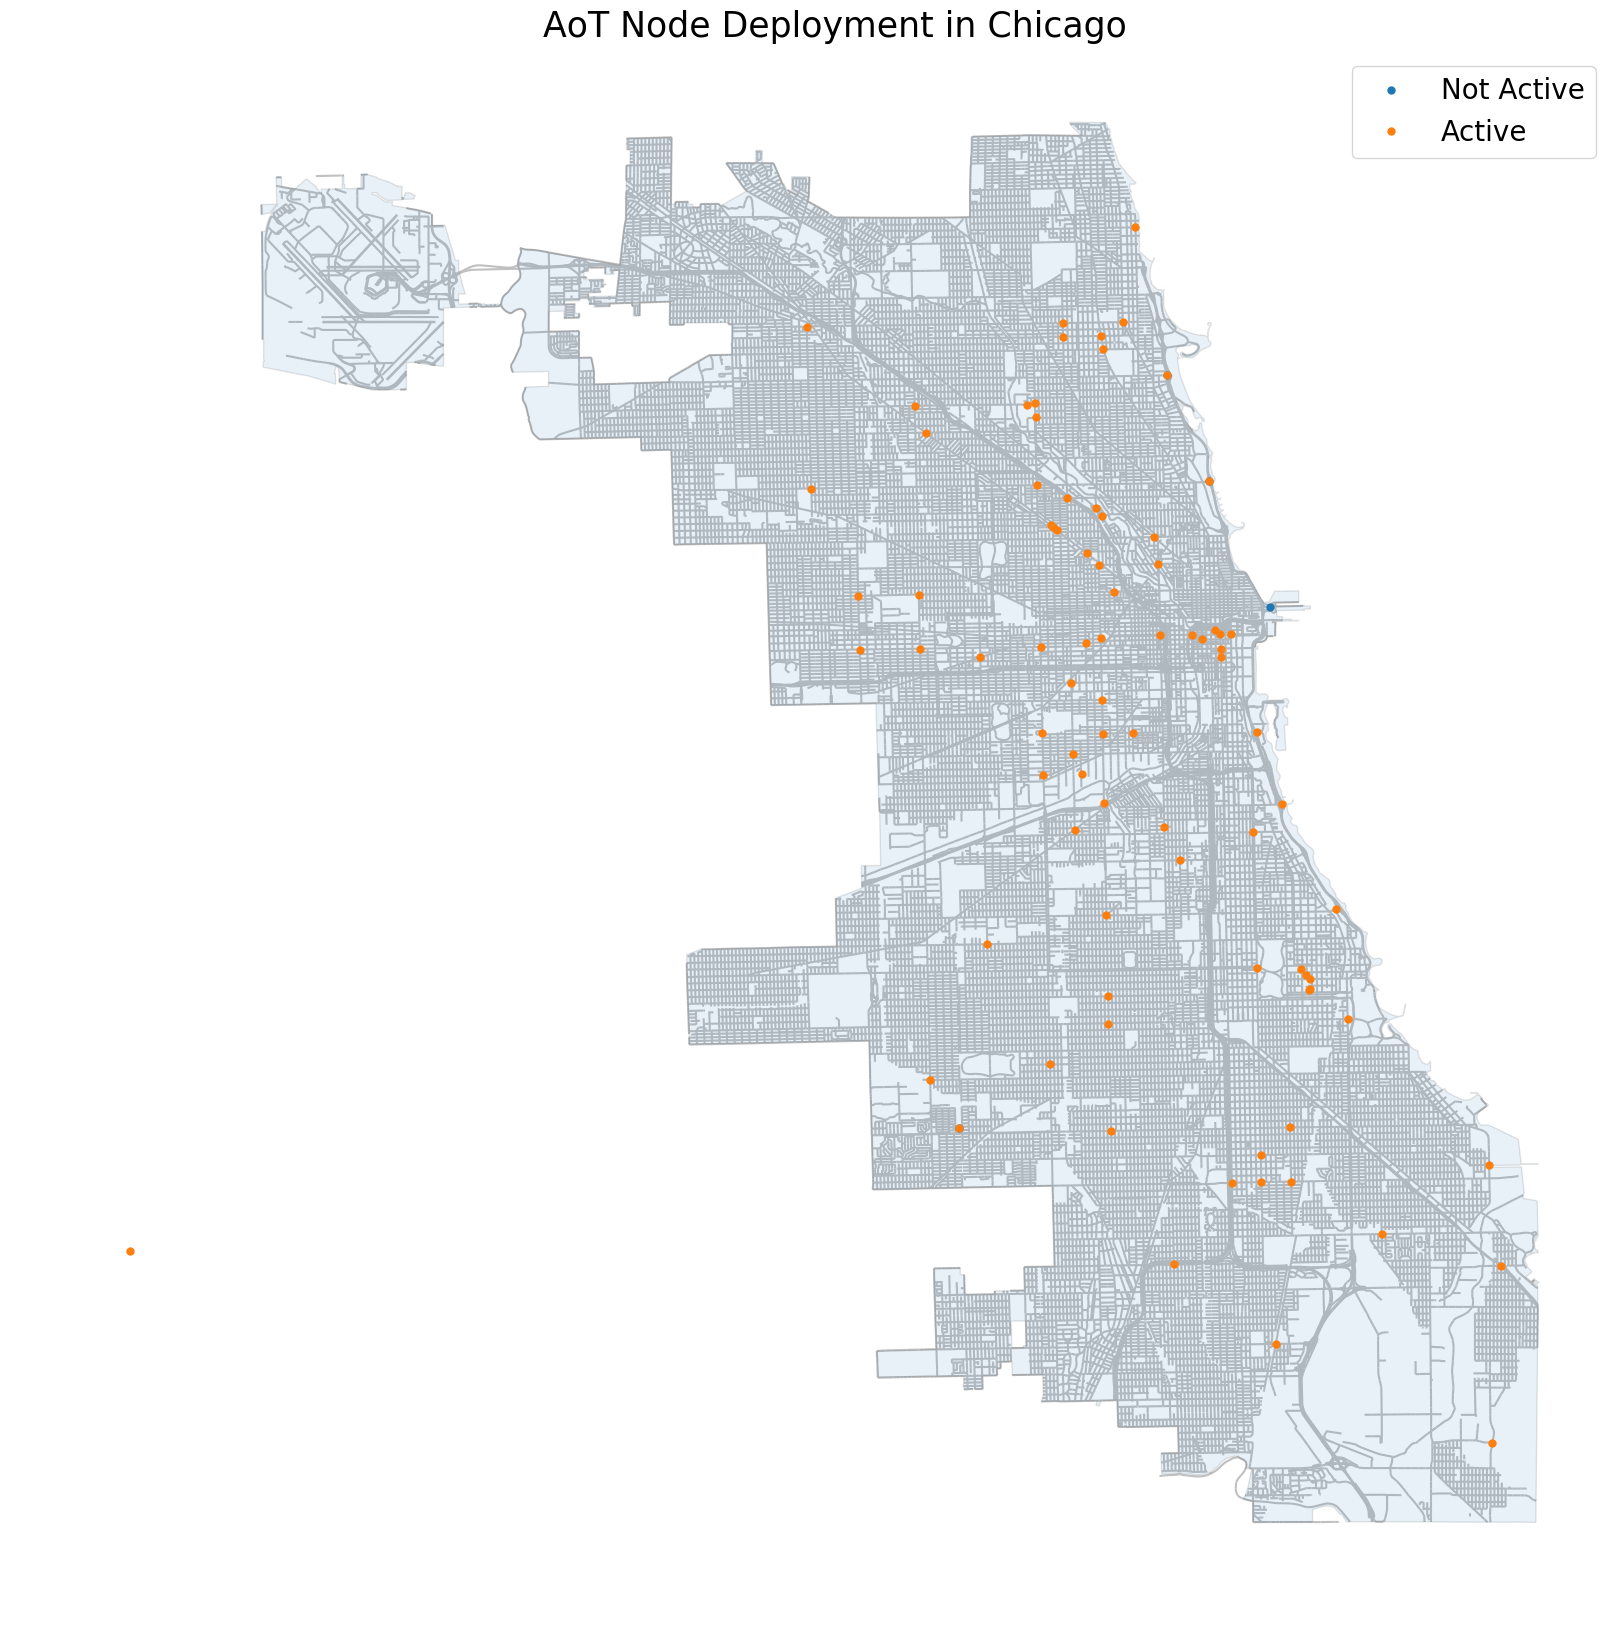

In [190]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline


# Create an empty dataframe
node_locations = pd.DataFrame()
# Pull the longitude and latitude information from the "nodes" dataframe
# Use zip to create set of lon, lat tuples then put into a list
node_locations['Coordinates'] = list(zip(nodes.lon, nodes.lat))
# Turn the list of node locations stored in Coordinates into a "Point" so we can use on plot
node_locations['Coordinates'] = node_locations['Coordinates'].apply(Point)
# Create a GeoDataFrame of node locations
node_locationsDF = gpd.GeoDataFrame(node_locations, geometry='Coordinates')

# create a new column in the nodes dataframe called status, if the end timestamp is NaN then r is placed in 
# the column otherwise a b is placed in column - this translates to red nodes are active and blue nodes
# are no longer reporting data
nodes['status'] = np.where(nodes['end_timestamp'].isnull(), 'r', 'b')

plt.style.use('default')

# This reads in a shapesfile (GIS data format) that is a mapping of Chicago streets
streetmap = gpd.read_file(Chicago_Streets_Shapefiles)

f, ax = plt.subplots(1, figsize=(20, 20))

# Plots the Chicago streets
streetmap.plot(ax=ax, color='silver', zorder = 0)

boundary = gpd.read_file(Chicago_Boundary_Shapefile)
# Plots the boundary of Chicago 
boundary.plot(ax = ax, alpha = 0.1, linewidth = 1.0, edgecolor = 'black', zorder = 5)

# plot locations on the map as a new layer - zorder ensures the nodes are on top
#node_locationsDF.plot(ax = ax, color = nodes['status'], marker='^', zorder = 10, legend=True)

# Plot locations on the map as a new layer - zorder ensures the nodes are on top and
for node_status, node in nodes.groupby('status'):
    ax.plot(node['lon'], node['lat'], marker='o', linestyle='', ms=5, label=node_status, zorder = 10)

ax.legend(['Not Active','Active'],fontsize=20)

ax.set_axis_off()
ax.set_title('AoT Node Deployment in Chicago', fontsize = 25, fontdict = {'verticalalignment':'bottom'})


Text(0.5,1,'AoT Node Flavors in Chicago')

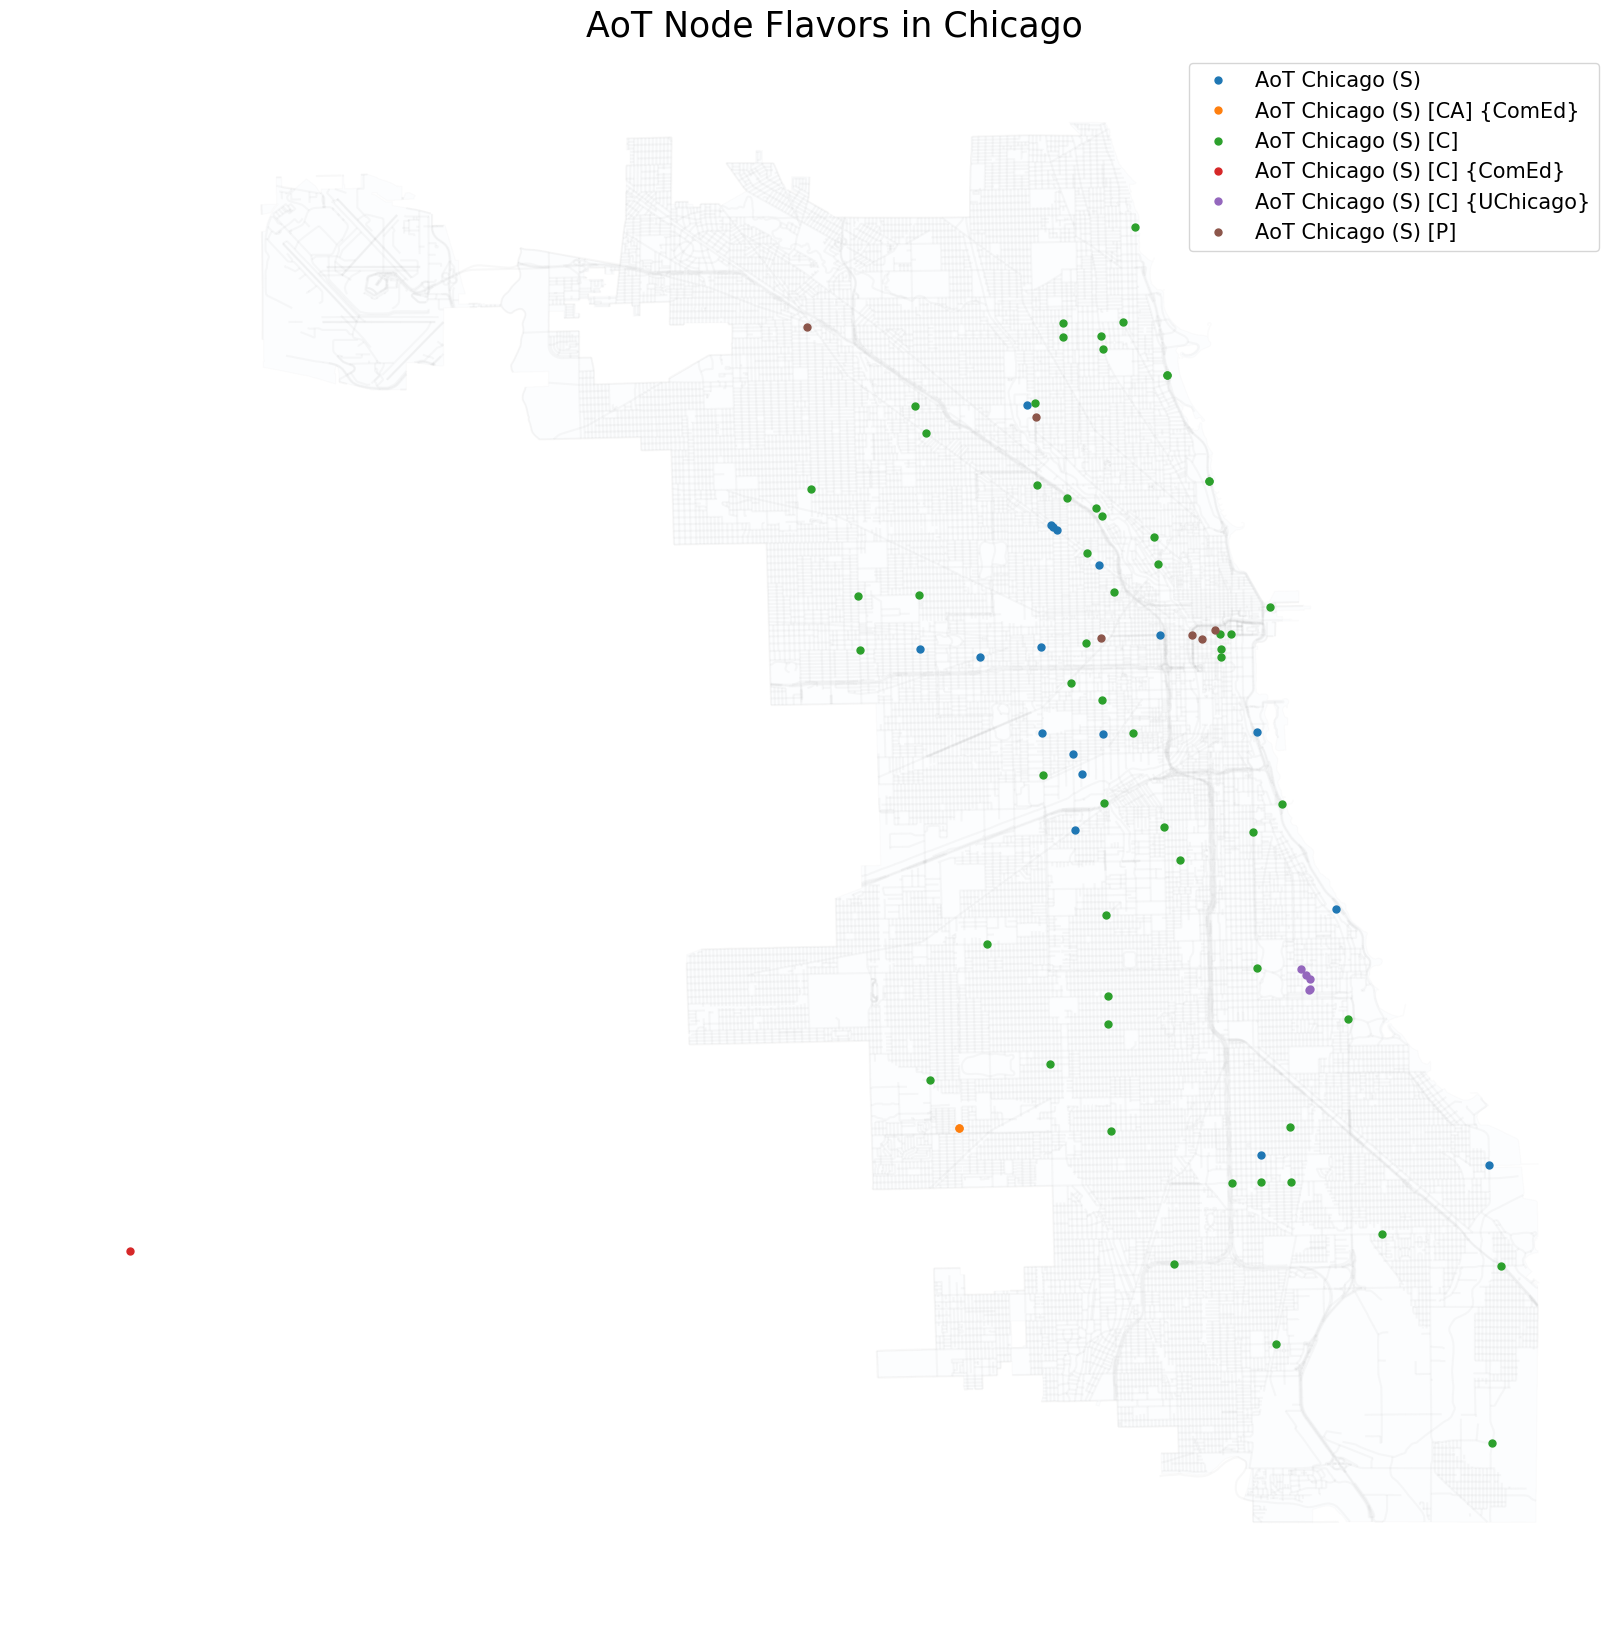

In [192]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline


# Create an empty dataframe
node_locations = pd.DataFrame()
# Pull the longitude and latitude information from the "nodes" dataframe
# Use zip to create set of lon, lat tuples then put into a list
node_locations['Coordinates'] = list(zip(nodes.lon, nodes.lat))
# Turn the list of node locations stored in Coordinates into a "Point" so we can use on plot
node_locations['Coordinates'] = node_locations['Coordinates'].apply(Point)
# Create a GeoDataFrame of node locations
node_locationsDF = gpd.GeoDataFrame(node_locations, geometry='Coordinates')

plt.style.use('default')

# This reads in a shapesfile (GIS data format) that is a mapping of Chicago streets
streetmap = gpd.read_file(Chicago_Streets_Shapefiles)

f, ax = plt.subplots(1, figsize=(20, 20))

# Plots the Chicago streets
streetmap.plot(ax=ax, alpha = 0.1, color='silver', zorder = 0)

boundary = gpd.read_file(Chicago_Boundary_Shapefile)
# Plots the boundary of Chicago 
boundary.plot(ax = ax, alpha = 0.01, linewidth = 1.0, edgecolor = 'black', zorder = 5)

# Plot locations on the map as a new layer - zorder ensures the nodes are on top and
for node_flavor, node in nodes.groupby('description'):
    ax.plot(node['lon'], node['lat'], marker='o', linestyle='', ms=5, label=node_flavor, zorder = 10)

ax.legend(fontsize=15)

ax.set_axis_off()
ax.set_title('AoT Node Flavors in Chicago',fontsize = 25, fontdict = {'verticalalignment':'bottom'})

# Sensor dataset from AoT

In [193]:
sensors = pd.read_csv(AoT_Data_Directory + '/sensors.csv',sep=",")
sensors.head(5)

ontology  subsystem           sensor  \
0               /sensing/air_quality/gases/co  chemsense               co   
1              /sensing/air_quality/gases/h2s  chemsense              h2s   
2              /sensing/air_quality/gases/no2  chemsense              no2   
3               /sensing/air_quality/gases/o3  chemsense               o3   
4  /sensing/air_quality/gases/oxidizing_gases  chemsense  oxidizing_gases   

       parameter hrf_unit  hrf_minval  hrf_maxval  \
0  concentration      ppm         0.0      1000.0   
1  concentration      ppm         0.0        50.0   
2  concentration      ppm         0.0        20.0   
3  concentration      ppm         0.0        20.0   
4  concentration      ppm         0.0       100.0   

                                           datasheet  
0  https://github.com/waggle-sensor/sensors/blob/...  
1  https://github.com/waggle-sensor/sensors/blob/...  
2  https://github.com/waggle-sensor/sensors/blob/...  
3  https://github.com/waggle-sensor/sensors/blob/...  
4  https://github.com/waggle-sensor/sensors/blob/...

# Data dataset from AoT

Given the size of the data, we are not going to load the full datasize.

In [194]:
#### Code to load full dataset (time the loading via %time)
# %time data = pd.read_csv(AoT_Data_Directory + '/data.csv',sep=",")
# data.head(5)

#### Results of a few loads (averages about 20 minutes for dataset from earlier in August)
# CPU times: user 20min 19s, sys: 2min 13s, total: 22min 32s
# Wall time: 22min 32s
# CPU times: user 19min 54s, sys: 2min 8s, total: 22min 2s
# Wall time: 22min 2s
# CPU times: user 20min 22s, sys: 2min 7s, total: 22min 30s
# Wall time: 22min 30s

We will extract a week of data for all nodes.

In [195]:
# using pandas to store and manipulate the AoT data
import pandas as pd

#### Code for picking date range and writing that data to disk
# week_of_data = data.loc['2018-8-5':'2018-8-11']
# week_of_data.to_csv('week.csv')

#### This code reloads the data back in for week.
week_of_data = pd.read_csv('./week.csv', sep=",")
week_of_data.head(5)

timestamp       node_id   subsystem         sensor    parameter  \
0  2018-08-05 00:00:00  001e0610f730  lightsense  apds_9006_020    intensity   
1  2018-08-05 00:00:00  001e0610f730  lightsense        hih6130     humidity   
2  2018-08-05 00:00:00  001e0610f730  lightsense        hih6130  temperature   
3  2018-08-05 00:00:00  001e0610f730  lightsense         ml8511    intensity   
4  2018-08-05 00:00:00  001e0610f730  lightsense       mlx75305    intensity   

  value_raw value_hrf  
0        48     3.858  
1       NaN     33.94  
2       NaN     49.91  
3        37    42.447  
4     31443   688.661

We will also extract all dates of data for one node.

In [196]:
# We will choose node '001e0610ba3b' for the full date range.
nodes[nodes['node_id'] == '001e0610ba3b']

node_id   project_id  vsn  \
start_timestamp                                   
2017-08-08       001e0610ba3b  AoT_Chicago  006   

                                            address        lat        lon  \
start_timestamp                                                             
2017-08-08       18th St & Lake Shore Dr Chicago IL  41.858136 -87.616055   

                     description start_timestamp end_timestamp status  
start_timestamp                                                        
2017-08-08       AoT Chicago (S)      2017-08-08           NaN      r

In [197]:
#### Select a single node of data and write to disk
# onenode = data.loc[data['node_id'] == "001e0610ba3b"]
# onenode.to_csv('onenode.csv')

#### This code reloads the data back in for one node.
node_data = pd.read_csv('./onenode.csv', sep=",")
node_data.head(5)

timestamp       node_id   subsystem         sensor    parameter  \
0  2017-08-09 00:00:02  001e0610ba3b  lightsense  apds_9006_020    intensity   
1  2017-08-09 00:00:02  001e0610ba3b  lightsense        hih6130     humidity   
2  2017-08-09 00:00:02  001e0610ba3b  lightsense        hih6130  temperature   
3  2017-08-09 00:00:02  001e0610ba3b  lightsense         ml8511    intensity   
4  2017-08-09 00:00:02  001e0610ba3b  lightsense       mlx75305    intensity   

  value_raw value_hrf  
0        45     3.617  
1       NaN     36.21  
2       NaN     32.57  
3        37    44.438  
4     31270     684.8

In [198]:
# Selects the htu21d sensor and "humidity" parameter from the larger set of data associated 
# with the single node
htu21d = node_data[(node_data['sensor'] == 'htu21d') & (node_data['parameter'] == 'humidity')].copy()

# Converts the timestamp type to datetime
htu21d.timestamp = pd.to_datetime(htu21d.timestamp)

# Convert the humidity values into floats so they can be plotted
htu21d.value_hrf = pd.to_numeric(htu21d['value_hrf'], errors='coerce').fillna(0)
htu21d.head(5)

timestamp       node_id subsystem  sensor parameter value_raw  \
11 2017-08-09 00:00:02  001e0610ba3b  metsense  htu21d  humidity       NaN   
30 2017-08-09 00:00:28  001e0610ba3b  metsense  htu21d  humidity       NaN   
49 2017-08-09 00:00:48  001e0610ba3b  metsense  htu21d  humidity       NaN   
68 2017-08-09 00:01:14  001e0610ba3b  metsense  htu21d  humidity       NaN   
87 2017-08-09 00:01:40  001e0610ba3b  metsense  htu21d  humidity       NaN   

    value_hrf  
11      58.38  
30      58.86  
49      58.49  
68      58.31  
87      58.21

Text(0,0.5,'Relative Humidity')

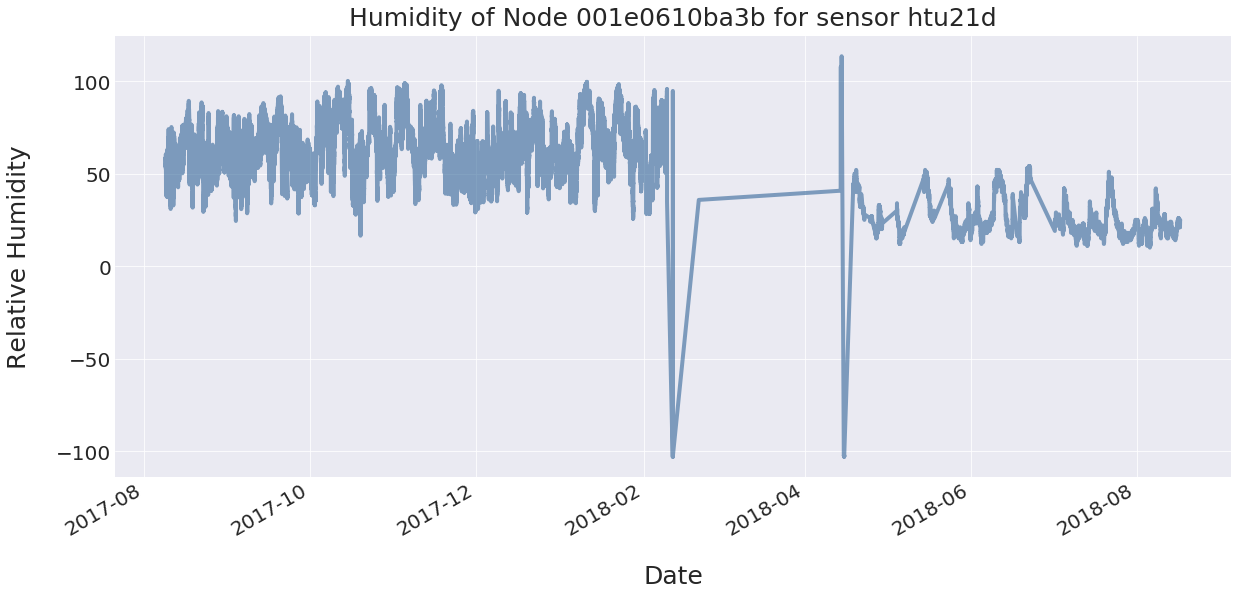

In [199]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

plt.style.use('seaborn-darkgrid')

# Convert that column into a datetime datatype
htu21d['timestamp'] = pd.to_datetime(htu21d['timestamp'])
# Set the datetime column as the index
htu21d.index = htu21d['timestamp'] 

# Set the graphing style we will use (https://matplotlib.org/users/style_sheets.html)
plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()
htu21d.value_hrf.plot(ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6), linewidth=4)

plt.tick_params(axis='both', which='both', labelsize=20)

# Set title and labels
ax.set_title('Humidity of Node 001e0610ba3b for sensor htu21d',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_xlabel('Date',fontsize = 25, labelpad=25)
ax.set_ylabel('Relative Humidity',fontsize = 25, labelpad=25)

Text(0,0.5,'Relative Humidity')

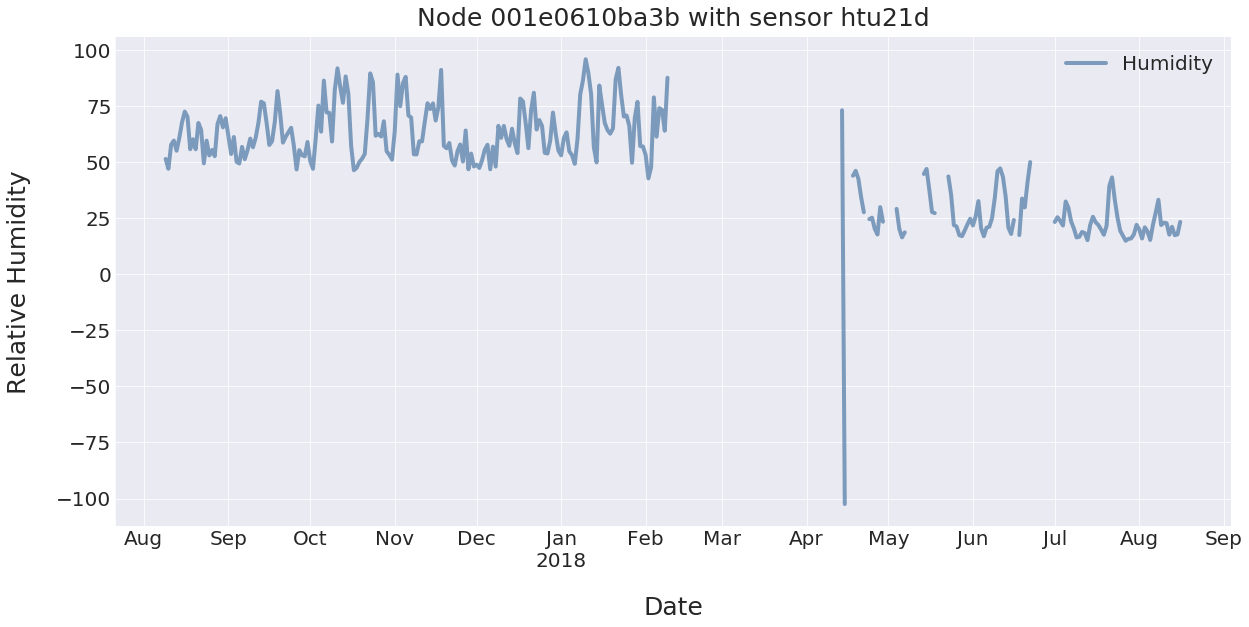

In [200]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Set the graphing style we will use (https://matplotlib.org/users/style_sheets.html)
plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()
# Resample on a daily average 
htu21d.resample('1440min').mean().plot(ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6), linewidth=4)

plt.tick_params(axis='both', which='both', labelsize=20)

ax.legend(['Humidity'],fontsize=20)

# Set title and labels
ax.set_title('Node 001e0610ba3b with sensor htu21d',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_xlabel('Date',fontsize = 25, labelpad=25)
ax.set_ylabel('Relative Humidity',fontsize = 25, labelpad=25)

Text(0,0.5,'Relative Humidity')

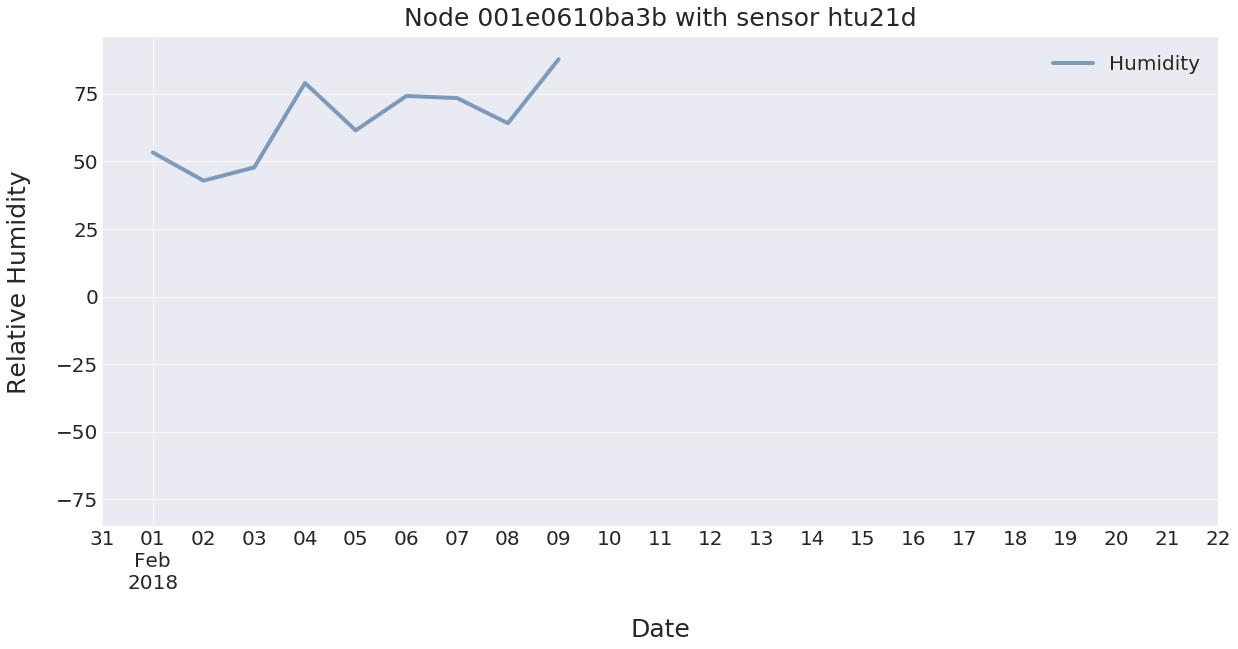

In [201]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Set the graphing style we will use (https://matplotlib.org/users/style_sheets.html)
plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()
htu21d['2018-02-01':'2018-02-28'].resample('1440min').mean().plot(ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6), linewidth=4)

plt.tick_params(axis='both', which='both', labelsize=20)

ax.legend(['Humidity'],fontsize=20)

# Set title and labels
ax.set_title('Node 001e0610ba3b with sensor htu21d',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_xlabel('Date',fontsize = 25, labelpad=25)
ax.set_ylabel('Relative Humidity',fontsize = 25, labelpad=25)

In [202]:
# Selects the tsl260rd sensor and "intensity" parameter from the larger set of data associated 
# with the single node
light_sensor = node_data[(node_data['sensor'] == 'tsl260rd') & (node_data['parameter'] == 'intensity')].copy()

# Convert the intensity values into floats so they can be graphed
light_sensor.value_hrf = pd.to_numeric(light_sensor['value_hrf'], errors='coerce').fillna(0)

# Convert timestamp to datetime format
light_sensor['timestamp'] = pd.to_datetime(light_sensor['timestamp'])
# Make the timestamp the index
light_sensor.index = light_sensor['timestamp']
# Throw away extra timestamp column
del light_sensor['timestamp']
light_sensor.head(4)

node_id   subsystem    sensor  parameter value_raw  \
timestamp                                                                      
2017-08-09 00:00:02  001e0610ba3b  lightsense  tsl260rd  intensity     21071   
2017-08-09 00:00:28  001e0610ba3b  lightsense  tsl260rd  intensity     21071   
2017-08-09 00:00:48  001e0610ba3b  lightsense  tsl260rd  intensity     21071   
2017-08-09 00:01:14  001e0610ba3b  lightsense  tsl260rd  intensity     21070   

                     value_hrf  
timestamp                       
2017-08-09 00:00:02     56.657  
2017-08-09 00:00:28     56.657  
2017-08-09 00:00:48     56.657  
2017-08-09 00:01:14     56.654

In [203]:
units_of_sensor = sensors[sensors['sensor'] == 'tsl260rd']
units_of_sensor

ontology   subsystem    sensor  parameter hrf_unit  \
39  /sensing/physical/ir  lightsense  tsl260rd  intensity  uW/cm^2   

    hrf_minval  hrf_maxval                                          datasheet  
39         0.0       132.0  https://github.com/waggle-sensor/sensors/blob/...

Text(0,0.5,'uW/cm^2')

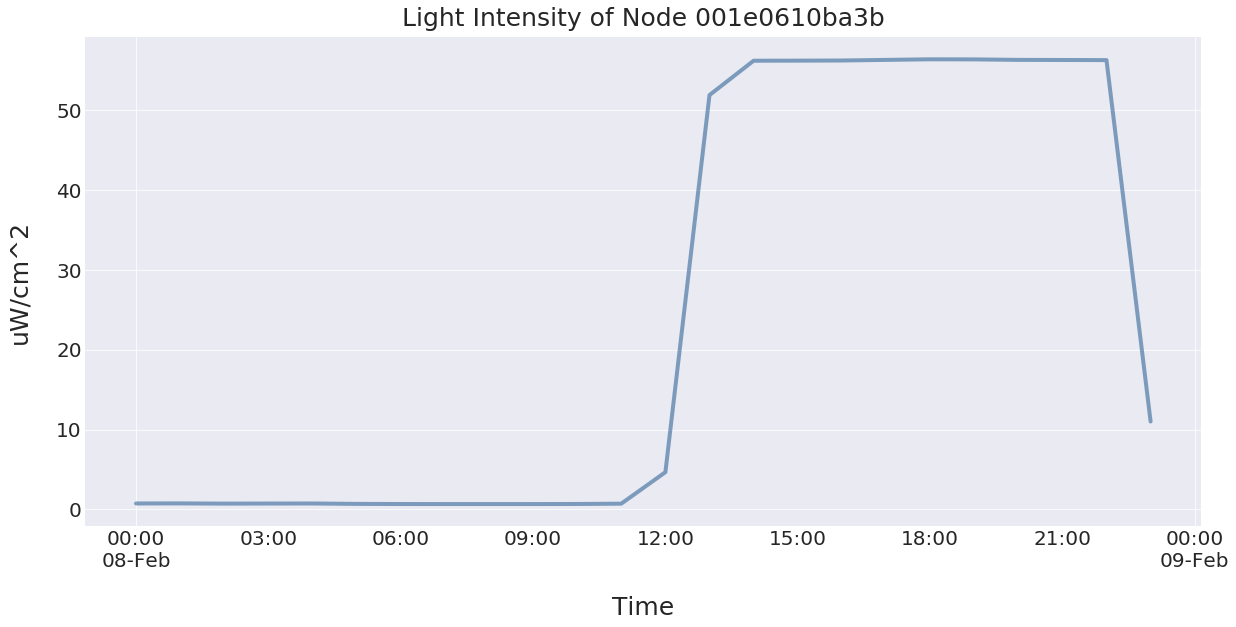

In [204]:
# Set the graphing style we will use (https://matplotlib.org/users/style_sheets.html)
plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()
#light_sensor.value_hrf.plot(ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6), linewidth=4)

light_sensor['2018-02-08'].value_hrf.resample('H').mean().plot(ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6), linewidth=4)

plt.tick_params(axis='both', which='both', labelsize=20)

# Set title and labels
ax.set_title('Light Intensity of Node 001e0610ba3b',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_xlabel('Time',fontsize = 25, labelpad=25)
ax.set_ylabel('uW/cm^2',fontsize = 25, labelpad=25)

In [205]:
# Shift it to the Chicago timezone
light_sensor.index = light_sensor.index.tz_localize('utc').tz_convert('US/Central')

Text(0,0.5,'uW/cm^2')

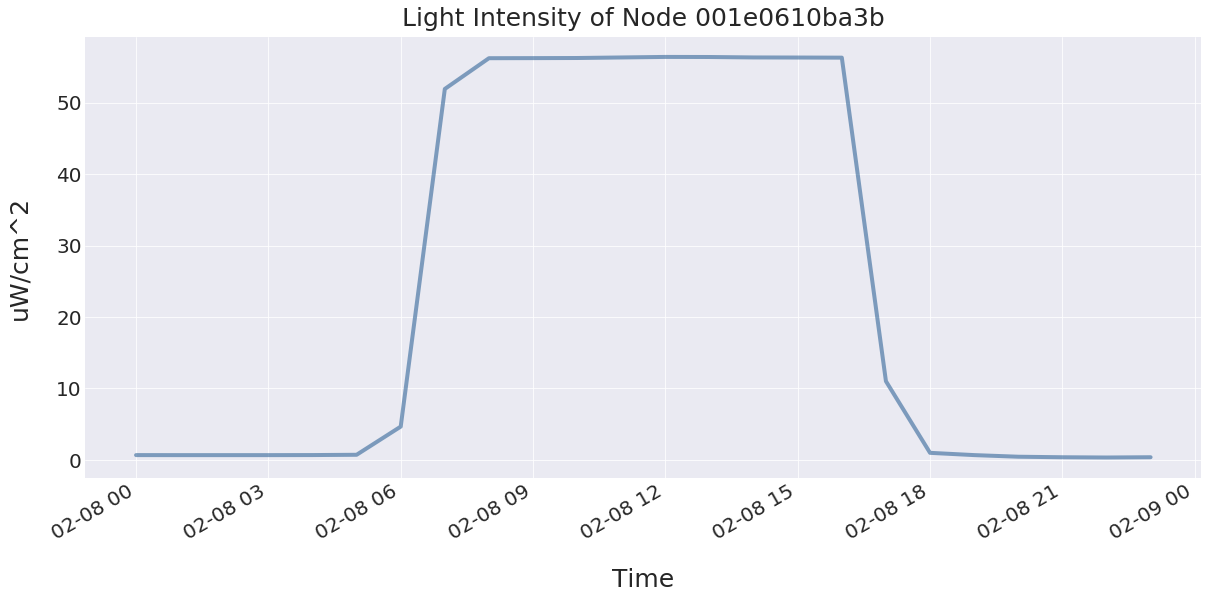

In [206]:
# Set the graphing style we will use (https://matplotlib.org/users/style_sheets.html)
plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()
#light_sensor.value_hrf.plot(ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6), linewidth=4)

light_sensor['2018-02-08'].value_hrf.resample('H').mean().plot(ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6), linewidth=4)

plt.tick_params(axis='both', which='both', labelsize=20)

# Set title and labels
ax.set_title('Light Intensity of Node 001e0610ba3b',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_xlabel('Time',fontsize = 25, labelpad=25)
ax.set_ylabel('uW/cm^2',fontsize = 25, labelpad=25)

In [207]:
# Convert celsius to fahrenheit
def celsius_to_fahrenheit(temp):
    newtemp = temp*1.8 + 32.0
    return newtemp

In [208]:
# This takes a long time!!!!!!
temperature = week_of_data[week_of_data['parameter'] == 'temperature'].copy()
# Convert that column into a datetime datatype
temperature['timestamp'] = pd.to_datetime(temperature['timestamp'])

# Converts the timestamp type to datetime
temperature.timestamp = pd.to_datetime(temperature.timestamp)

# Convert the temperature values into floats so they can be plotted
temperature.value_hrf = pd.to_numeric(temperature['value_hrf'], errors='coerce').fillna(0)
temperature.index = temperature['timestamp']

Text(0.5,0,'Week of Data')

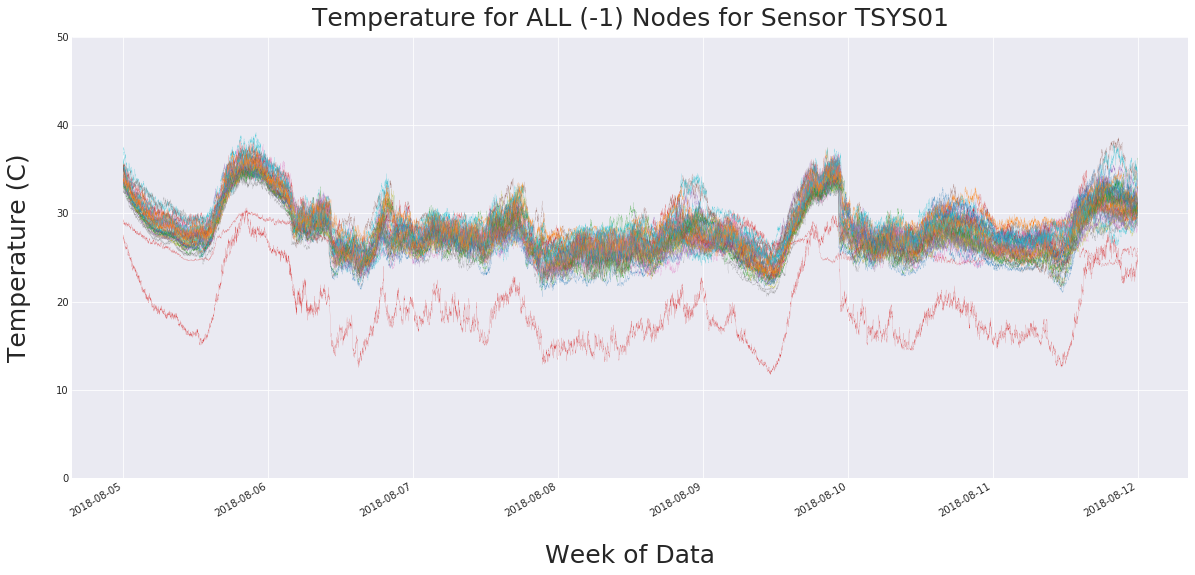

In [209]:
TSYS01 = temperature[temperature['sensor'] == 'tsys01']
TSYS01.index = TSYS01['timestamp']
# Throw away extra timestamp column
del TSYS01['timestamp']

# Set the graphing style we will use (https://matplotlib.org/users/style_sheets.html)
plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()

# One node was reporting 200C 
ax.set_ylim(0, 50)

# Set title and labels
ax.set_title('Temperature for ALL (-1) Nodes for Sensor TSYS01',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_ylabel('Temperature (C)',fontsize = 25, labelpad=25)

# Plot locations on the map as a new layer - zorder ensures the nodes are on top and
for nodeId, t in TSYS01.groupby('node_id'):
    t['value_hrf'].plot(ax = ax, figsize=[20,9], linewidth=0.1)
    
ax.set_xlabel('Week of Data', fontsize = 25, labelpad=25)

In [210]:
# Kills warning on chained copy warning
pd.set_option('mode.chained_assignment', None)
TSYS01["common_temp"] = celsius_to_fahrenheit(TSYS01["value_hrf"])

Text(0.5,0,'Week of Data')

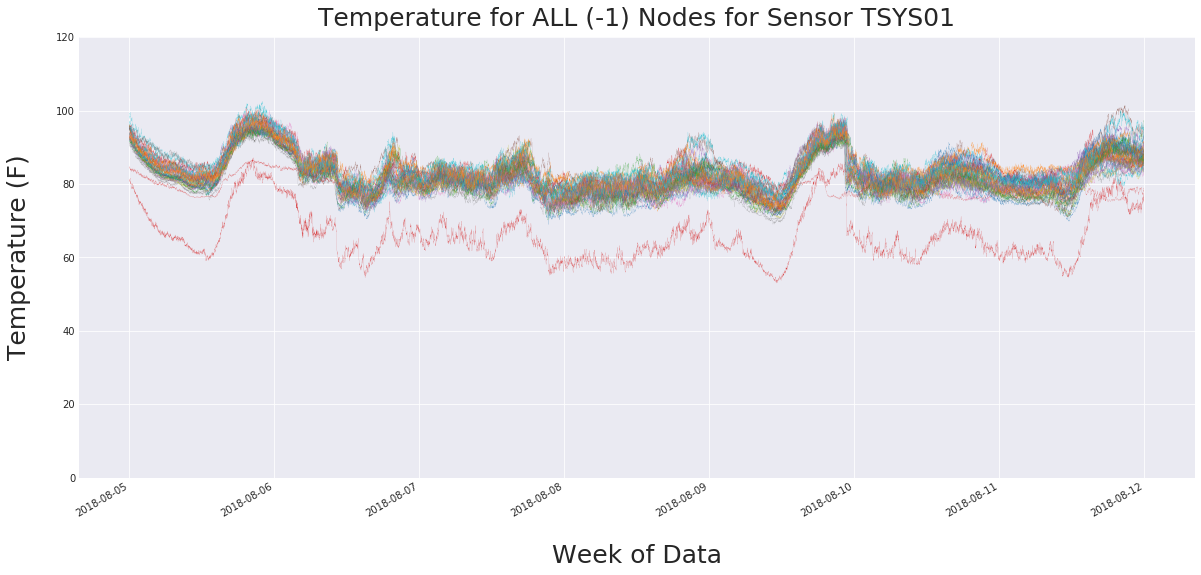

In [211]:
# Set the graphing style we will use (https://matplotlib.org/users/style_sheets.html)
plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()

ax.set_ylim(0, 120)

# Set title and labels
ax.set_title('Temperature for ALL (-1) Nodes for Sensor TSYS01',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_ylabel('Temperature (F)',fontsize = 25, labelpad=25)

# Plot locations on the map as a new layer - zorder ensures the nodes are on top and
for nodeId, t in TSYS01.groupby('node_id'):
    t['common_temp'].plot(ax = ax, figsize=[20,9], linewidth=0.1)
    
ax.set_xlabel('Week of Data', fontsize = 25, labelpad=25)